In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import statsmodels.api as sm

In [3]:
data = pd.read_csv('dataset_linear_regression/advertising.csv')

In [4]:
data.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Pairplot 
Zavisnosti pomegu sekoja od kolonite

TV i Sales imaat zavisnost - Linearna Regresija

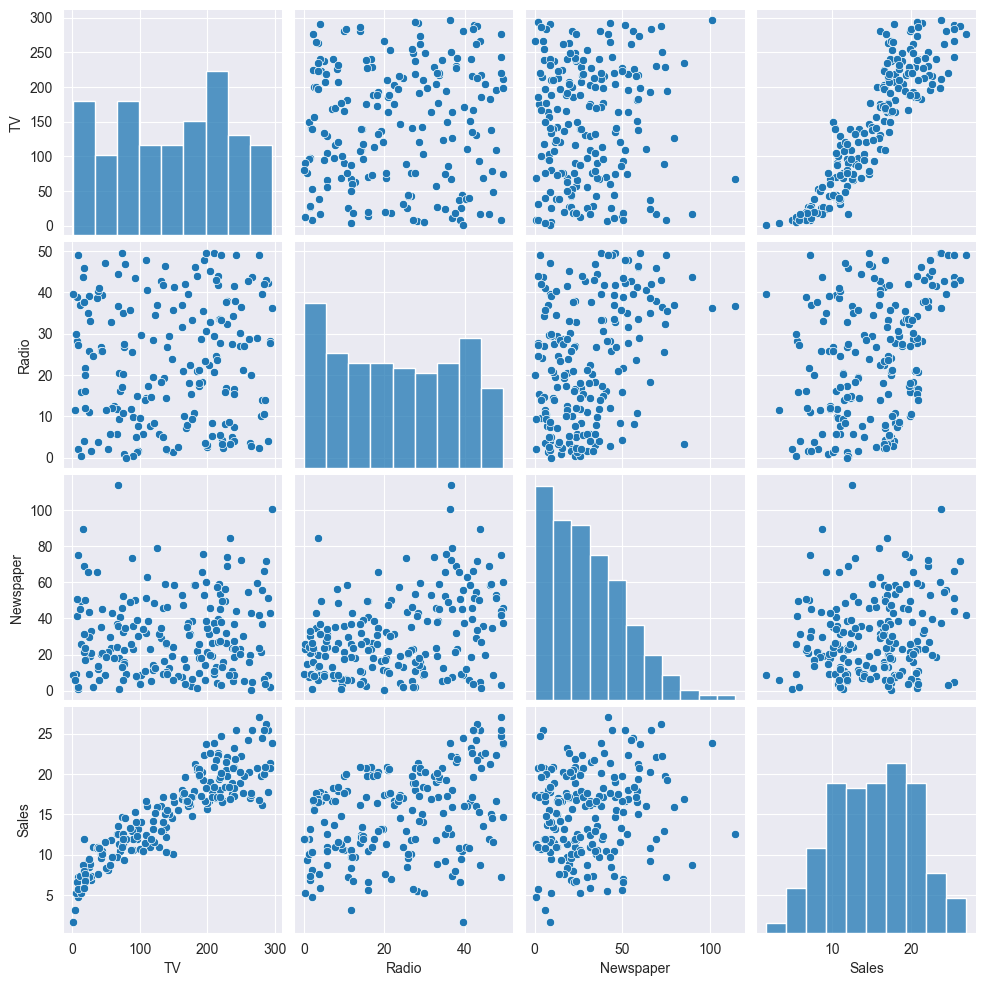

In [6]:
sns.pairplot(data)

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Proverka na kategoriski podatoci - String..
Ne mozeme da gi imame na vlez - mora da gi menuvame 

# Continuous value (linear regression)

In [8]:
y_target = data[data.columns[:-1]] # zemi sve osven poslednata kolona - Zemi gi vleznite podatoci

In [9]:
y_target

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y_target2 = data.iloc[:,:-1] #zemi sve osven poslednata kolona - Zemi gi vleznite podatoci

Vlez - TV, Radio, Newspaper,
Izlez - Sales 

In [11]:
y_target2

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
x_train, x_test, y_train, y_test = train_test_split(y_target, data['Sales'], test_size=0.2) # vlez - TV, Radio, Newspaper. Izlez (y) - Sales

In [13]:
x_train # 80 posto zima zamo za treniranje - na random gi deli podatocite

,TV,Radio,Newspaper
189,18.7,12.1,23.4
75,16.9,43.7,89.4
149,44.7,25.8,20.6
192,17.2,4.1,31.6
168,215.4,23.6,57.6
...,...,...,...
169,284.3,10.6,6.4
12,23.8,35.1,65.9
26,142.9,29.3,12.6
60,53.5,2.0,21.4


In [14]:
y_train

189     6.7
75      8.7
149    10.1
192     5.9
168    17.1
       ... 
169    20.0
12      9.2
26     15.0
60      8.1
188    20.9
Name: Sales, Length: 160, dtype: float64

Ako sakame staticko delenje na training i test - Prvite 80% da gi zememe , ne random vrednost

In [15]:
train = data[:int(len(data)*0.8)] #prvite 160 vrednosti
train 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
155,4.1,11.6,5.7,3.2
156,93.9,43.5,50.5,15.3
157,149.8,1.3,24.3,10.1
158,11.7,36.9,45.2,7.3


# Pravime Normalizacija (Scaling the values)
Pravime normalizacija bidejki imame mnogu outliers i sakame da se dovedeme do vrednosti od [0,1], no ne sakame y da go normalizirame , zosto ako go normalizirame , "Sales" - krajnata ke bide od [0,1] sto ne ni odgovara

MinMaxScaler: Scales the data to a fixed range, usually [0, 1]. It transforms the data by scaling each feature to a given range. The formula used is: [ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} ] where (X_{\text{min}}) and (X_{\text{max}}) are the minimum and maximum values of the feature, respectively. 
 
StandardScaler: Standardizes the data by removing the mean and scaling to unit variance. It transforms the data to have a mean of 0 and a standard deviation of 1. The formula used is: [ X_{\text{scaled}} = \frac{X - \mu}{\sigma} ] where (\mu) is the mean of the feature and (\sigma) is the standard deviation.

In [16]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Nauci go x_train i transformiraj po x_train. Sakame na trenirackoto mnozestvo da ucime, a na testirackoto samo da transformiraame SPORED TRENIRACKOTO

In [17]:
x_test

array([[ 9.81554220e-01,  1.00131741e+00,  1.57095440e-02],
       [-4.05919781e-01, -5.79843444e-01,  2.07377343e-03],
       [-1.48849725e-01, -3.02802439e-01,  1.33886222e-01],
       [ 1.42291651e+00, -1.94688877e-01, -1.42513687e+00],
       [-3.61614813e-02,  2.64793765e-01,  6.61136015e-01],
       [ 2.63166666e-01,  1.29187261e+00, -1.27514340e+00],
       [-6.08120346e-02, -5.79843444e-01, -2.75186894e-01],
       [ 2.22082410e-01,  5.89134453e-01,  9.65668224e-01],
       [ 7.78480614e-01,  4.47235402e-01, -1.01606376e+00],
       [ 1.28440387e+00, -1.06846607e-01, -7.51955929e-02],
       [-2.49799610e-01,  7.91847383e-01, -8.75160797e-01],
       [-1.40015876e+00,  1.90465691e-01,  5.29323567e-01],
       [-1.55892740e-01,  1.34592939e+00, -1.25193418e-01],
       [ 1.43435407e-01, -1.37042387e+00, -1.06151633e+00],
       [-1.17243461e+00,  1.10943097e+00,  6.11138190e-01],
       [-1.48467495e+00,  9.94560313e-01, -4.56997168e-01],
       [-1.60323237e+00,  1.08240258e+00

In [18]:
x_train

array([[-1.47528426e+00, -7.28499592e-01, -3.75182544e-01],
       [-1.49641331e+00,  1.40674327e+00,  2.62468697e+00],
       [-1.17008693e+00,  1.97222788e-01, -5.02449736e-01],
       [-1.49289180e+00, -1.26906741e+00, -2.47148341e-03],
       [ 8.33650900e-01,  4.85666395e-02,  1.17929530e+00],
       [ 3.60595043e-01, -2.57614349e-02, -7.01674025e-03],
       [-8.13240829e-01,  8.18875774e-01,  9.56577710e-01],
       [ 1.55555996e+00,  1.75811235e+00,  4.61144714e-01],
       [-7.97980962e-01,  2.58036667e-01, -4.25180370e-01],
       [ 9.34600785e-01, -1.38393807e+00, -7.29712578e-01],
       [ 1.43817637e+00,  1.41350037e+00, -1.21150980e+00],
       [ 7.33874851e-01, -9.78512206e-01, -2.38824839e-01],
       [ 1.05785355e+00, -1.31636709e+00,  2.41560516e+00],
       [-1.19004214e+00,  2.03979886e-01, -5.06994993e-01],
       [ 6.24407319e-02,  8.59418360e-01, -1.16605723e+00],
       [ 2.24430082e-01,  9.40503532e-01, -1.10242364e+00],
       [-2.74450163e-01, -9.78512206e-01

# Training Model

In [19]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [20]:
model.score(x_train, y_train) #Sto pogolem R2 score , tolku originalnata vrednost na y i y_predict se bliski megju sebe 

0.8994215996377158

# Slope

Koristime formula za linearna regresija 

sales = 4.58621604 * TV + 1.51745471 * Radio -0.02338478 * Newspaper + 15.2975 (intercept)


In the context of linear regression, the coefficients represent the relationship between each independent variable (feature) and the dependent variable (target). Specifically, each coefficient indicates the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.

Yes, in the context of the linear regression model, the coefficient for the TV feature (4.58621604) indicates that for each additional unit of TV advertising, the sales are expected to increase by approximately 4.59 units, assuming all other features remain constant. This means that TV advertising has a significant positive impact on the sales target variable.

In [21]:
model.coef_

array([4.66333341, 1.58376721, 0.05710945])

In [22]:
model.intercept_

14.981874999999999

In [23]:
y_predict = model.predict(x_test) #predict na vrednostite od testiranoto mnozestvo - dali se sovpagaat od vistinskite 

In [24]:
y_predict # predicted values

array([21.14594043, 12.17071712, 13.8158167 , 21.22767845, 15.27037075,
       18.18231166, 13.7642354 , 17.00571993, 19.26247958, 20.79796396,
       15.02109811,  8.78435055, 16.37938429, 13.41970712, 11.3064037 ,
        9.60739388,  9.26892015, 15.24848059, 21.27112335, 21.49270908,
       20.20273535, 15.8179554 , 18.14968692, 24.91917349,  9.32229677,
       21.12653143,  8.06188879, 20.95875247, 21.85897383, 21.90513902,
        5.24574736, 19.53732082, 21.18389759, 15.90624708,  9.85186947,
       20.26913124,  5.3740044 ,  9.35386109,  8.96167305, 23.58831732])

In [25]:
y_test #originalnite vrednosti

39     21.5
71     12.4
159    12.9
33     17.4
120    15.5
193    19.6
116    12.2
95     16.9
59     18.4
184    17.6
123    15.2
44      8.5
64     16.0
180    15.5
1      10.4
166     8.0
126     6.6
197    14.8
104    20.7
58     23.8
92     19.4
9      15.6
21     17.5
101    23.8
65     11.3
28     18.9
56      5.5
52     22.6
128    24.7
111    21.8
8       4.8
27     20.9
69     22.3
50     16.4
191    11.9
142    20.1
108     5.3
24      9.7
127    11.9
42     20.7
Name: Sales, dtype: float64

In [26]:
x = sm.add_constant(x_train) #dodava konstanta
model = sm.OLS(y_train, x)

In [27]:
x

array([[ 1.00000000e+00, -1.47528426e+00, -7.28499592e-01,
        -3.75182544e-01],
       [ 1.00000000e+00, -1.49641331e+00,  1.40674327e+00,
         2.62468697e+00],
       [ 1.00000000e+00, -1.17008693e+00,  1.97222788e-01,
        -5.02449736e-01],
       [ 1.00000000e+00, -1.49289180e+00, -1.26906741e+00,
        -2.47148341e-03],
       [ 1.00000000e+00,  8.33650900e-01,  4.85666395e-02,
         1.17929530e+00],
       [ 1.00000000e+00,  3.60595043e-01, -2.57614349e-02,
        -7.01674025e-03],
       [ 1.00000000e+00, -8.13240829e-01,  8.18875774e-01,
         9.56577710e-01],
       [ 1.00000000e+00,  1.55555996e+00,  1.75811235e+00,
         4.61144714e-01],
       [ 1.00000000e+00, -7.97980962e-01,  2.58036667e-01,
        -4.25180370e-01],
       [ 1.00000000e+00,  9.34600785e-01, -1.38393807e+00,
        -7.29712578e-01],
       [ 1.00000000e+00,  1.43817637e+00,  1.41350037e+00,
        -1.21150980e+00],
       [ 1.00000000e+00,  7.33874851e-01, -9.78512206e-01,
      

In [28]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     465.0
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.49e-77
Time:                        04:48:38   Log-Likelihood:                -307.32
No. Observations:                 160   AIC:                             622.6
Df Residuals:                     156   BIC:                             634.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9819      0.132    113.289      0.000      14.721      15.243
x1             4.6633      0.133     35.175      0.000       4.401       4.925
x2             1.5838      0.142     11.115      0.000       1.302       1.865
x3             0.0571      0.143      0.400      0.690      -0.225       0.339
==============================================================================
Omnibus:                       17.049   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.026
Skew:                          -0.482   Prob(JB):                     6.74e-08
Kurtosis:                       5.006   Cond. No.                         1.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
x = sm.add_constant(x_test)
results.predict(x)

array([21.14594043, 12.17071712, 13.8158167 , 21.22767845, 15.27037075,
       18.18231166, 13.7642354 , 17.00571993, 19.26247958, 20.79796396,
       15.02109811,  8.78435055, 16.37938429, 13.41970712, 11.3064037 ,
        9.60739388,  9.26892015, 15.24848059, 21.27112335, 21.49270908,
       20.20273535, 15.8179554 , 18.14968692, 24.91917349,  9.32229677,
       21.12653143,  8.06188879, 20.95875247, 21.85897383, 21.90513902,
        5.24574736, 19.53732082, 21.18389759, 15.90624708,  9.85186947,
       20.26913124,  5.3740044 ,  9.35386109,  8.96167305, 23.58831732])

# KNN Classification & Logistic Regression

In [30]:
df = pd.read_csv('dataset_classification/Bank_Personal_Loan_Modelling.csv')

In [31]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [32]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

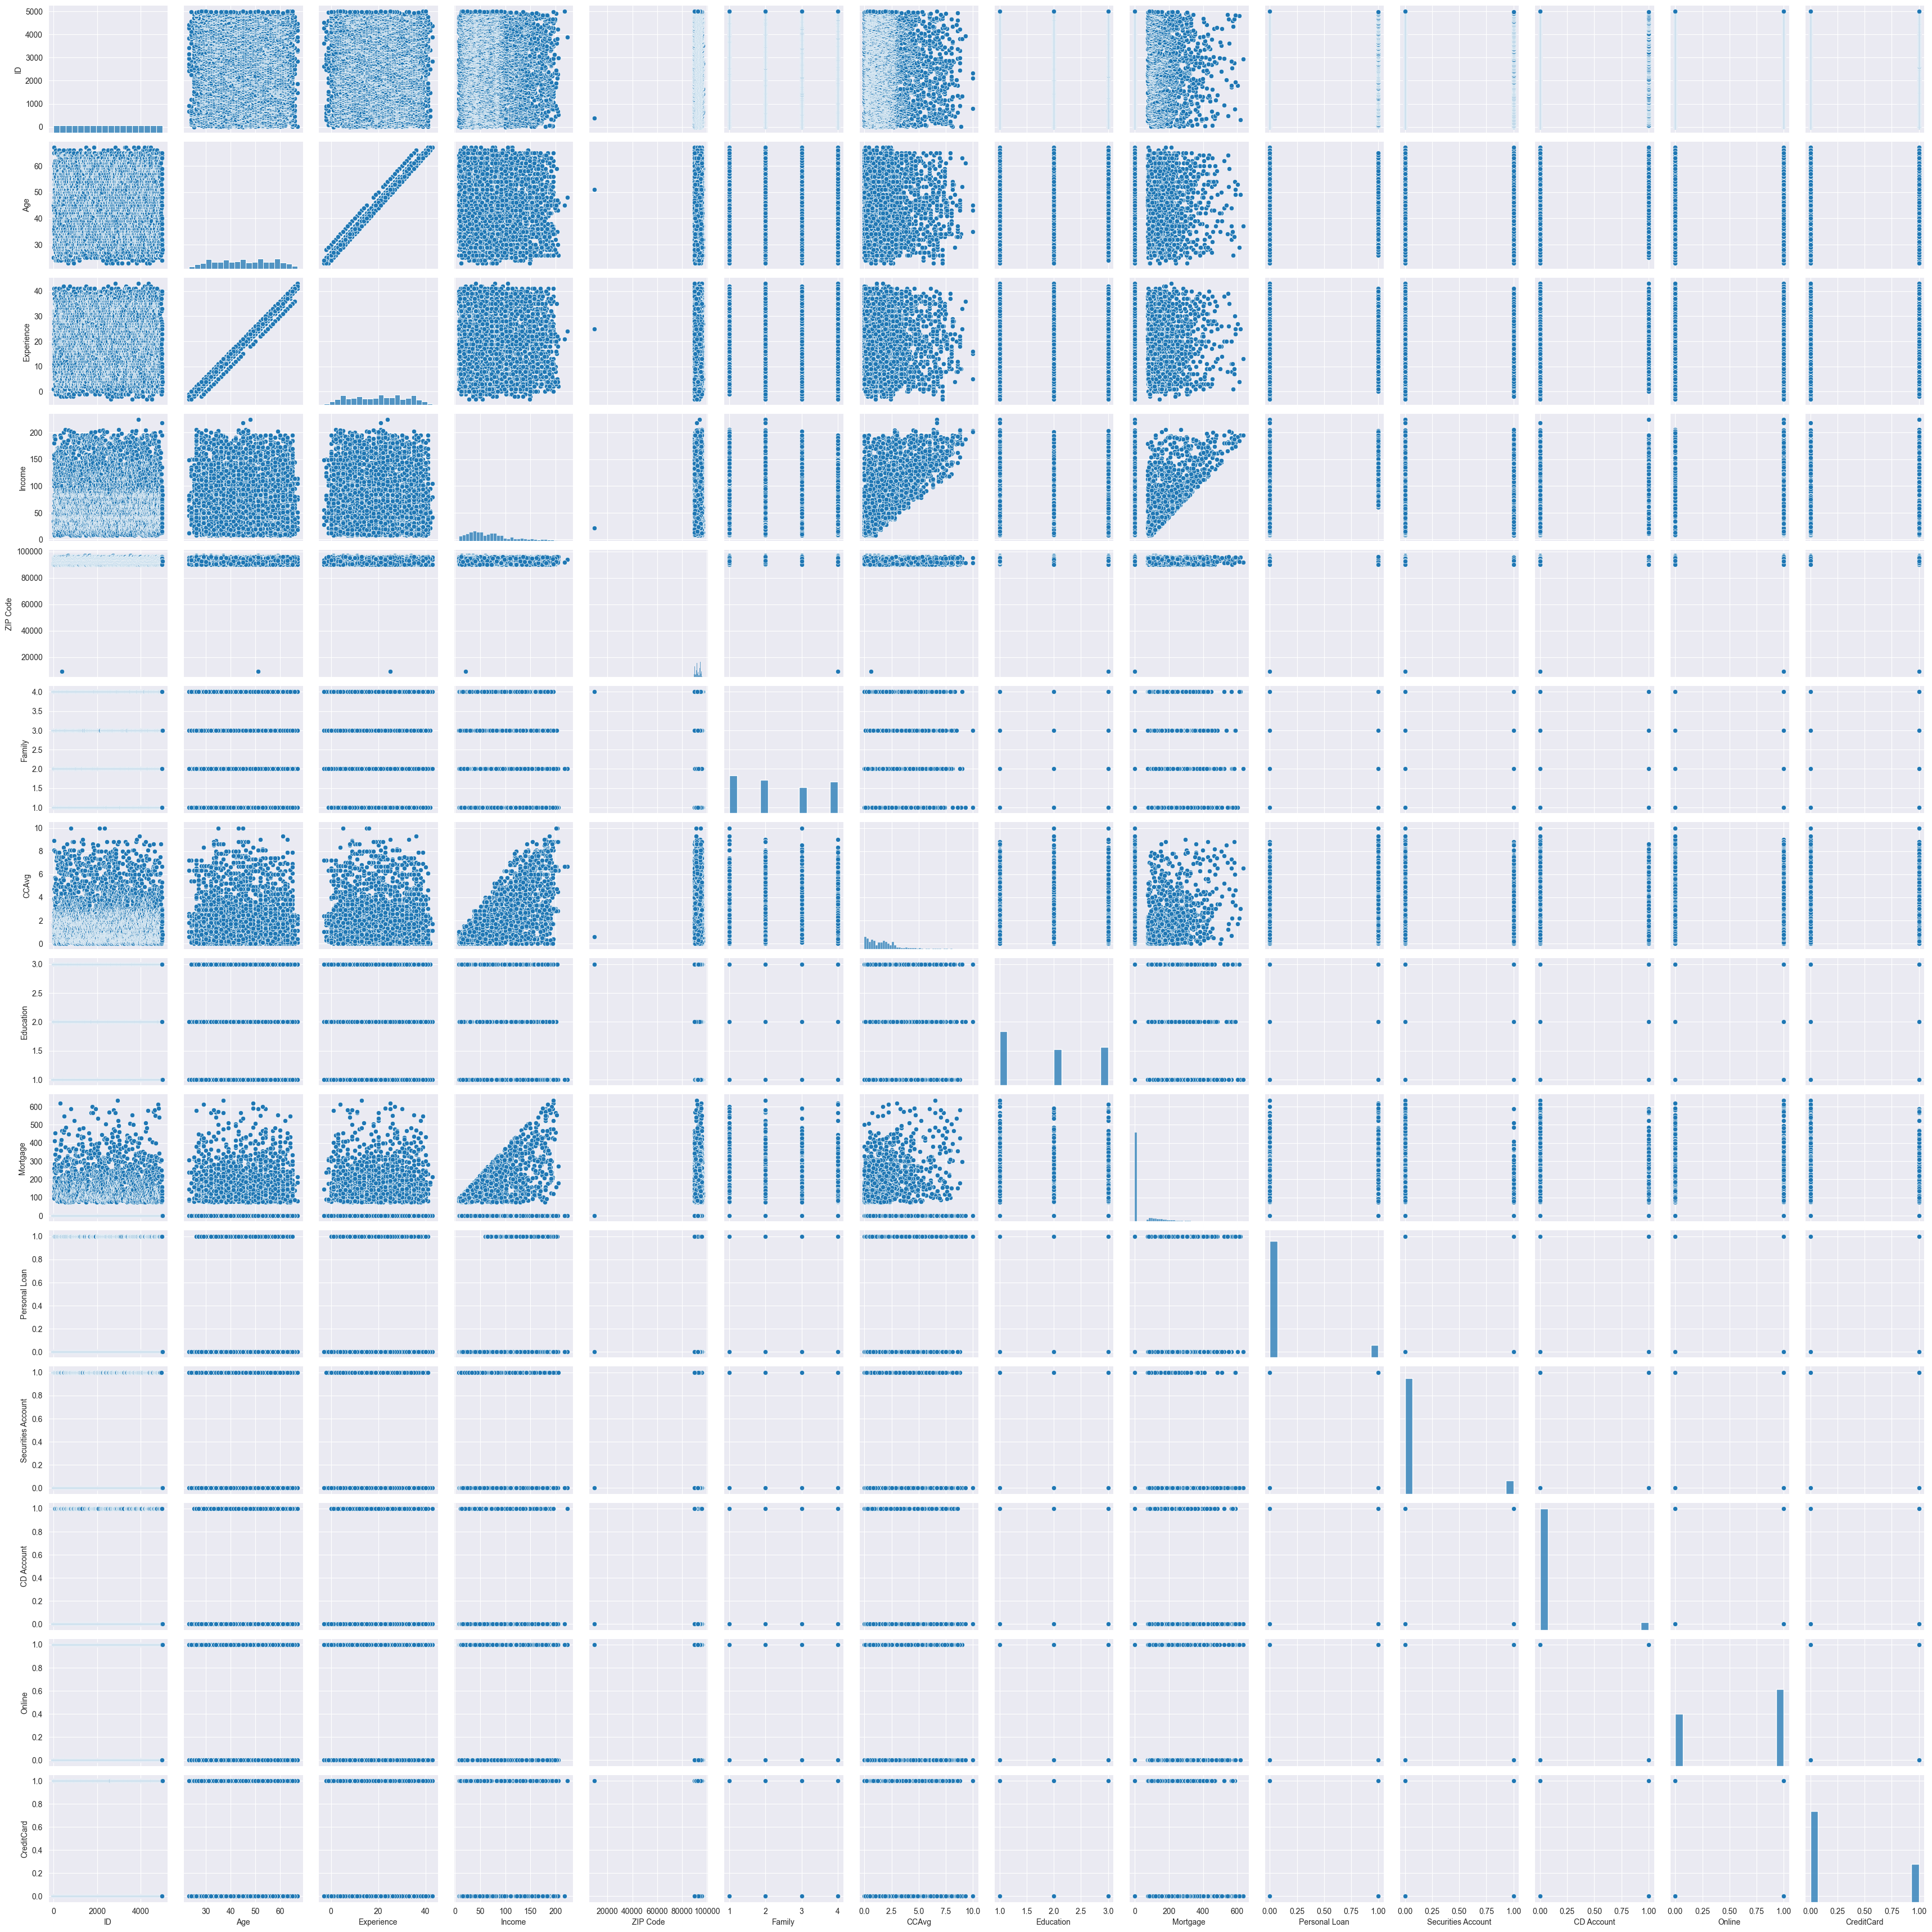

In [33]:
sns.pairplot(df)

Personal Loan ni e target , sto znaci se naoga negde na sredina. Cim e na sredina ke mora da ja dropneme i da ja zememe posebno

IMAME CISTA LINEARNA REGRESIJA - Age so Experience

In [34]:
target = df.drop('Personal Loan', axis='columns') #ili axis=1
target

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [35]:
target_withoutID = target.iloc[:,1:] #startuvajki od ID (ne go zimame ID-to)

In [36]:
target_withoutID2 = target[target.columns[1:]]
target_withoutID2

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [37]:
x_train, x_test, y_train, y_test = train_test_split(target_withoutID, df['Personal Loan'], test_size=0.2) # Personal Loan ni e target, pretpostavuvame DALI KE IMA ILI NE. (0 ili 1)

In [38]:
x_train

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3412,55,29,79,90029,4,4.9,1,0,0,0,0,0
4979,50,26,92,90740,1,2.6,2,213,0,0,0,1
2888,55,28,39,94542,3,1.0,2,0,0,0,1,1
3594,34,8,79,95616,1,2.5,1,0,0,0,1,0
3597,56,26,51,92028,3,2.0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4242,46,21,68,94720,1,0.2,2,0,0,0,1,0
1584,46,20,25,93401,4,0.6,3,125,0,0,0,0
3129,39,14,10,92705,2,0.3,2,0,1,0,0,1
231,35,10,61,94304,4,2.1,3,0,0,0,1,0


In [39]:
# Proveruvame za kakov tip na klasifikacija stanuva zbor 

df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [40]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
confusion_matrix(y_test, y_pred)

array([[907,   5],
       [ 39,  49]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       912
           1       0.91      0.56      0.69        88

    accuracy                           0.96      1000
   macro avg       0.93      0.78      0.83      1000
weighted avg       0.95      0.96      0.95      1000



In [44]:
print(f1_score(y_test, y_pred))

0.6901408450704225


In [45]:
print(accuracy_score(y_test, y_pred))

0.956
